# Unsupervised Learning Team JS4
We will use this Notebook to build and test various models relating to our goal.

## Our Team:
- Kwanda Silekwa
- Thembinkosi Malefo
- Sihle Riti
- Nomfundo Manyisa
- Ofentse Sabe
- Thanyi

## Introduction
The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

### What is recommendation system?
Recommender System is a system that seeks to predict or filter preferences according to the user’s choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.

![image.png](attachment:image.png)



The current recommendation systems that are bring used and are popular are the content-based filtering and collaborative filtering which works by implementing different information sources to make the recommendations.

- Content-based filtering (CBF) : makes recommendations based on user preferences for product features.
- Collaborative filtering (CF): mimics user-to-user recommendations (i.e. it relies on how other users have responded to the same items). 

It predicts users preferences as a linear, weighted combination of other user preferences.
We have to note that both of these methods have limitations: The CBF can recommend a new item but needs more data on user preferences to give out the best match. On the other hand, the CF requires large dataset with active users who rated the product before to make the most accurate predictions. The combination of both of these methods is known as hybrid recommendation systems.

## Problem statement:
Construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences

## Importing Libraries

In [5]:
# !pip install surprise

In [6]:
!pip install comet_ml

     |████████████████████████████████| 276 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 529 kB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 1.5 MB/s  eta 0:00:01
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=c248b6c3a2772034bf74a3ce7ba736da7a2efaa17d50c1297ffa233b42142e78
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [7]:
from comet_ml import Experiment

# Packages for data processing
import numpy as np
import pandas as pd
# import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp
from ast import literal_eval
import ast
from IPython.display import FileLink
from collections import Counter

# visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns
from numpy.random import RandomState
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import BaselineOnly
from surprise import accuracy

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
from datetime import datetime

#word cloud
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
sns.set()

# Kaggle requirements
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))   
        


/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv
/kaggle/input/edsa-movie-recommendation-challenge/movies.csv
/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv
/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv
/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv
/kaggle/input/edsa-movie-recommendation-challenge/train.csv
/kaggle/input/edsa-movie-recommendation-challenge/test.csv
/kaggle/input/edsa-movie-recommendation-challenge/tags.csv
/kaggle/input/edsa-movie-recommendation-challenge/links.csv


In [8]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="fdVf8HBu4jwg9hKw347n5Dj8h",
    project_name="unsupervised-predict-team-js4",
    workspace="kwanda9700",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Run will not be logged 
For more details, please refer to: https://www.comet.ml/docs/python-sdk/warnings-errors/


## Loading the dataset
We going to load the dataframe will be working with

In [9]:
#Loading data
df_train = pd.read_csv('../input/edsa-movie-recommendation-challenge/train.csv')
df_test = pd.read_csv('../input/edsa-movie-recommendation-challenge/test.csv')
df_movies = pd.read_csv('../input/edsa-movie-recommendation-challenge/movies.csv')
df_sample_submission = pd.read_csv('../input/edsa-movie-recommendation-challenge/sample_submission.csv')
df_imdb = pd.read_csv('../input/edsa-movie-recommendation-challenge/imdb_data.csv')
df_genome_tags = pd.read_csv("../input/edsa-movie-recommendation-challenge/genome_tags.csv")
df_genome_scores = pd.read_csv("../input/edsa-movie-recommendation-challenge/genome_scores.csv")
df_tags = pd.read_csv("../input/edsa-movie-recommendation-challenge/tags.csv")
df_links = pd.read_csv("../input/edsa-movie-recommendation-challenge/links.csv")

In [10]:
# df_train=pd.read_csv('data/train.csv')
# df_links=pd.read_csv('data/links.csv')
# df_movies=pd.read_csv('data/movies.csv')
# df_imdb = pd.read_csv('data/imdb_data.csv')
# df_sample_submission = pd.read_csv('data/sample_submission.csv')
# df_tags=pd.read_csv('data/tags.csv')
# df_genome_scores=pd.read_csv('data/genome_scores.csv')
# df_genome_tags=pd.read_csv('data/genome_tags.csv')
# df_test=pd.read_csv('data/test.csv')

## Evaluating the data

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

### Source
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

### Supplied files
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [11]:
print("Train data contains {} rows and {} columns".format(df_train.shape[0], df_train.shape[1]))
print("Movie data contains {} rows and {} columns".format(df_movies.shape[0], df_movies.shape[1]))
print("Imdb data contains {} rows and {} columns".format(df_imdb.shape[0], df_imdb.shape[1]))
print("Genome_tags data contains {} rows and {} columns".format(df_genome_tags.shape[0], df_genome_tags.shape[1]))
print("Genome_scores data contains {} rows and {} columns".format(df_genome_scores.shape[0], df_genome_scores.shape[1]))
print("Tags data contains {} rows and {} columns".format(df_tags.shape[0], df_tags.shape[1]))
print("Links data contains {} rows and {} columns".format(df_links.shape[0], df_links.shape[1]))

Train data contains 10000038 rows and 4 columns
Movie data contains 62423 rows and 3 columns
Imdb data contains 27278 rows and 6 columns
Genome_tags data contains 1128 rows and 2 columns
Genome_scores data contains 15584448 rows and 3 columns
Tags data contains 1093360 rows and 4 columns
Links data contains 62423 rows and 3 columns


In [12]:
#viewing training data
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


Train:

- UserId
- movieId : Identifier for movies used
- rating : Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars)
- timestamp: represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [13]:
#viewing tags data
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


Tags:

- userId
- movieId : Identifier for movies used
- tag : User-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.
- timestamp : represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [14]:
#viewing movies data
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Movies:

- movieId : Identify the movies that are watched 

- title : Entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

- genres: They are pipe-separated list, and are selected from the following:
    - Action
    - Adventure
    - Animation
    - Children's
    - Comedy
    - Crime
    - Documentary
    - Drama
    - Fantasy
    - Film-Noir
    - Horror
    - Musical
    - Mystery
    - Romance
    - Sci-Fi
    - Thriller
    - War
    - Western
    - (no genres listed)

In [15]:
#viewing links data
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Links:

- movieId : Identifier for movies used by https://movielens.org
- imdbId : Identifier for movies used by http://www.imdb.com
- tmdbId : An identifier for movies used by https://www.themoviedb.org.

In [16]:
#viewing genome scores data
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [17]:
#viewing genome tags data
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


Genome_tags:

- tagId
- tag : tag descriptions for the tag IDs in the genome file

In [18]:
#viewing Imdb_data
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [19]:
df_imdb.describe(include = 'all')

,movieId,title_cast,director,runtime,budget,plot_keywords
count,27278.000000,17210,17404,15189.000000,7906,16200
unique,NaN,17143,11786,NaN,1362,16008
top,NaN,Patton Oswalt,See full summary,NaN,"$10,000,000",Documentary
freq,NaN,5,28,NaN,232,19
mean,59855.480570,NaN,NaN,100.312331,NaN,NaN
std,44429.314697,NaN,NaN,31.061707,NaN,NaN
min,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,6931.250000,NaN,NaN,89.000000,NaN,NaN
50%,68068.000000,NaN,NaN,98.000000,NaN,NaN
75%,100293.250000,NaN,NaN,109.000000,NaN,NaN


# Data Preparation

In [20]:
def to_list(df, column) :
    df[column] = df[column].str.split('|')
    return df[column]

In [21]:
def get_genre_list(df,column) :
    genres_list = []
    for genre in df[column].unique():
        genres_list = genres_list + genre.split("|")
        genres_list = list(set(genres_list))
    return genres_list

In [22]:
# Make a census of the genre keywords
def get_genre_labels(df,column) :
    genre_labels = set()
    for s in df_movies['genres'].str.split('|').values:
        genre_labels = genre_labels.union(set(s))
    return genre_labels

In [23]:
# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
   
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
                
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [24]:
def to_str(df, column) : 
    df[column] = [','.join(map(str, l)) for l in df[column]]
    return df[column]

In [25]:
genre_labels = get_genre_list(df_movies, 'genres')
print(genre_labels)

['Documentary', 'Fantasy', 'Action', 'IMAX', 'Sci-Fi', 'Crime', 'Mystery', 'Romance', 'Drama', 'Horror', '(no genres listed)', 'Animation', 'Children', 'Thriller', 'Comedy', 'Adventure', 'Musical', 'Western', 'Film-Noir', 'War']


In [26]:
keyword_occurences, dum = count_word(df_movies, 'genres', genre_labels)
print(keyword_occurences[:5])

[['Drama', 25606], ['Comedy', 16870], ['Thriller', 8654], ['Romance', 7719], ['Action', 7348]]


In [27]:
genres_list = get_genre_list(df_movies, 'genres')
print(genres_list)

['Documentary', 'Fantasy', 'Action', 'IMAX', 'Sci-Fi', 'Crime', 'Mystery', 'Romance', 'Drama', 'Horror', '(no genres listed)', 'Animation', 'Children', 'Thriller', 'Comedy', 'Adventure', 'Musical', 'Western', 'Film-Noir', 'War']


### Removing the pipe between genres, title_cast and plot_keywords

In [28]:
df_movies.genres = to_list(df_movies, 'genres')

In [29]:
df_movies.genres = to_str(df_movies, 'genres')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy"
1,2,Jumanji (1995),"Adventure,Children,Fantasy"
2,3,Grumpier Old Men (1995),"Comedy,Romance"
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance"
4,5,Father of the Bride Part II (1995),Comedy


In [30]:
df_imdb.plot_keywords = to_list(df_imdb, 'plot_keywords')

In [31]:
df_imdb.title_cast = to_list(df_imdb, 'title_cast')
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


#### Inorder to play along with our data and before data processing. Let's merge some of our data to see how it work out.

### Merging of the df_train, df_movies and df_imdb dataframes into df_full_movies

In [32]:
# Merge the train and movies data
table1 = pd.merge(df_train, df_movies, on = ['movieId'])
# df_table1 = df_train.merge(df_movies, on='movieId')

# Viewing the 1st 5 rows
table1.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),"Comedy,Crime,Drama,Thriller"
1,87388,57669,3.5,1237455297,In Bruges (2008),"Comedy,Crime,Drama,Thriller"
2,137050,57669,4.0,1425631854,In Bruges (2008),"Comedy,Crime,Drama,Thriller"
3,120490,57669,4.5,1408228517,In Bruges (2008),"Comedy,Crime,Drama,Thriller"
4,50616,57669,4.5,1446941640,In Bruges (2008),"Comedy,Crime,Drama,Thriller"


In [33]:
# Checking for nulls
table1.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [34]:
# Merging table1 dataframe and Imdb data
df_full_movies = pd.merge(table1, df_imdb, on='movieId')

# Viewing the 1st 5 rows
df_full_movies.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]"
1,87388,57669,3.5,1237455297,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]"
2,137050,57669,4.0,1425631854,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]"
3,120490,57669,4.5,1408228517,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]"
4,50616,57669,4.5,1446941640,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]"


In [35]:
# Checking for nulls
df_full_movies.isnull().sum()

userId                 0
movieId                0
rating                 0
timestamp              0
title                  0
genres                 0
title_cast       2604407
director         2602688
runtime          2653058
budget           3152276
plot_keywords    2610043
dtype: int64

In [36]:
df_full_movies.shape

(9633031, 11)

In [37]:
df_full_movies.dtypes

userId             int64
movieId            int64
rating           float64
timestamp          int64
title             object
genres            object
title_cast        object
director          object
runtime          float64
budget            object
plot_keywords     object
dtype: object

### Merging of the df_genome_scores and df_genome_tags into df_tags_scores

In [38]:
df_tags_scores = pd.merge(df_genome_tags , df_genome_scores , on = ['tagId'])
df_tags_scores.head()

,tagId,tag,movieId,relevance
0,1,007,1,0.02875
1,1,007,2,0.04125
2,1,007,3,0.04675
3,1,007,4,0.03425
4,1,007,5,0.04300


In [39]:
# Capturing Tags only if its relevance is higher than 80% to a movie
df_tags_scores_2 = df_tags_scores[df_tags_scores['relevance'] > 0.80]
df_tags_scores_2.head()

,tagId,tag,movieId,relevance
9,1,007,10,0.99950
1530,1,007,1722,0.99975
2115,1,007,2376,0.99975
2652,1,007,2947,0.99950
2653,1,007,2948,0.99975


# Exploratory data analysis

### Cleaning of the data and Visualizing

In [40]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']

##  &#128202; 1. Ratings
#### i) Since we want to check the number of ratings people did, let add a column named, 'Number of rating'

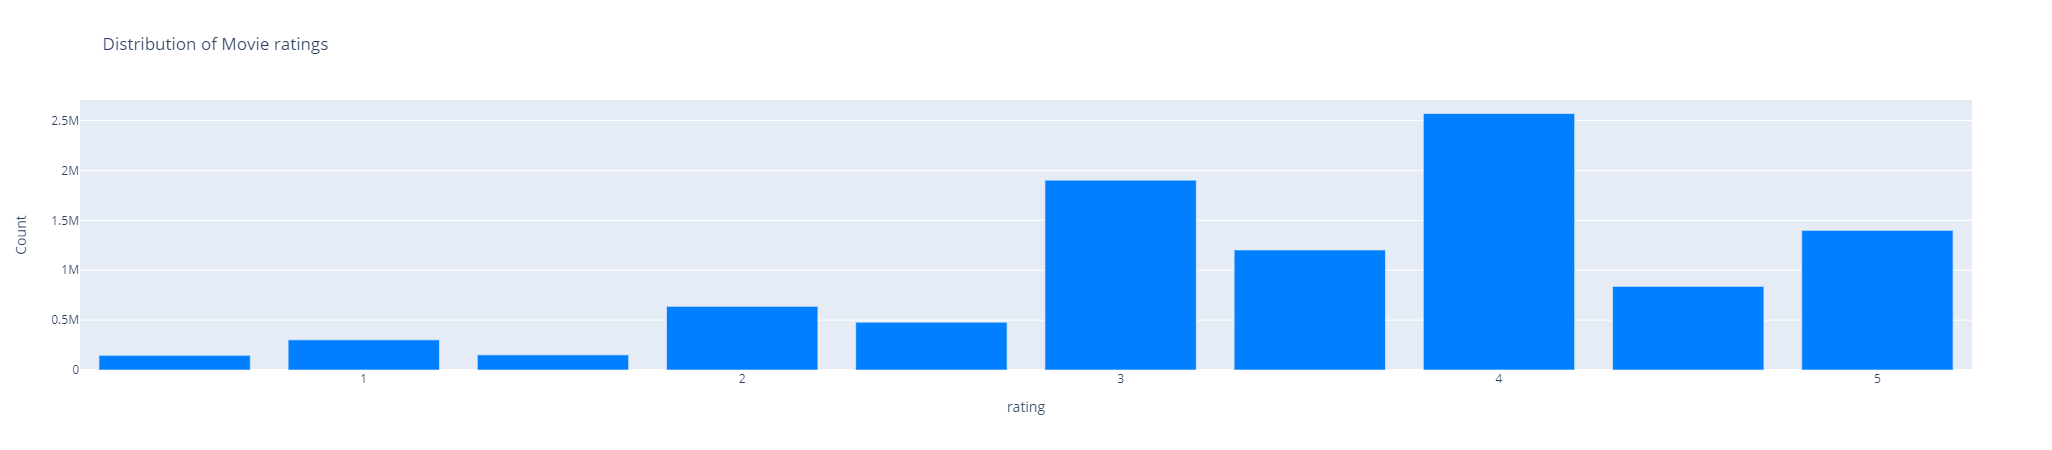

In [41]:
# Creating a plot for the movie ratings
data = df_full_movies['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x=data.index,
               y=data.values,
               marker=dict(color='#0080ff'))
layout = dict(title='Distribution of Movie ratings'.format(df_full_movies.shape[0]),
              xaxis=dict(title='rating'),
              yaxis=dict(title='Count'))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


- We can observe that most of the movies we rated above 3 which exceeded the average of ratings and least of the movie rating was below 3

#### ii) Here is a distribution of number of ratings given by each user. Histogram is truncated for users that rated less than 200 movies. 

Only users with less than 200 ratings are displayed (9,120 users omitted).


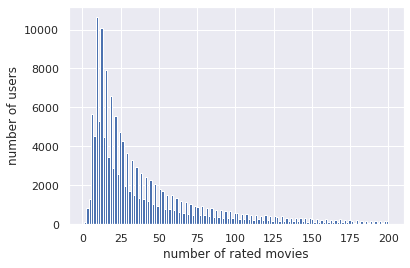

In [42]:
user_ratings = df_full_movies.groupby(by='userId')
d = user_ratings['rating'].count()
limit = 200
plt.hist(d[d<=limit], bins='fd')
plt.xlabel('number of rated movies')
plt.ylabel('number of users')
print(f'Only users with less than {limit} ratings are displayed ({len(user_ratings) - len(d[d<=limit]):,} users omitted).')
plt.show()

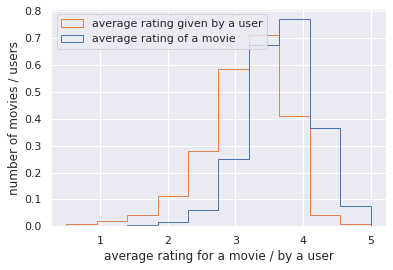

In [43]:
users_average = df_full_movies.groupby('userId')['rating'].mean()
items_average = df_full_movies.groupby('movieId')['rating'].mean()
plt.hist([users_average, items_average], histtype='step', density=True)
plt.xlabel('average rating for a movie / by a user')
plt.ylabel('number of movies / users')
plt.legend(['average rating given by a user', 'average rating of a movie'], loc=2)
plt.show()

##  &#128202; 2. Movies

This is a list of the most rated (among movies with at least 20 ratings):

In [44]:
movie_ratings = df_full_movies.groupby(by='movieId')
most_rated = movie_ratings['rating'].count().sort_values(ascending=False).head(10)
print(pd.merge(pd.DataFrame(most_rated), df_movies, on='movieId')[['title','rating']].rename(index=lambda x: x+1, columns={'rating': 'n. of ratings'}),'\n')

                                        title  n. of ratings
1            Shawshank Redemption, The (1994)          32831
2                         Forrest Gump (1994)          32383
3                         Pulp Fiction (1994)          31697
4            Silence of the Lambs, The (1991)          29444
5                          Matrix, The (1999)          29014
6   Star Wars: Episode IV - A New Hope (1977)          27560
7                        Jurassic Park (1993)          25518
8                     Schindler's List (1993)          24004
9                           Braveheart (1995)          23722
10                          Fight Club (1999)          23536 



This is a list of the top rated movies (among movies with at least 20 ratings):

In [45]:
movie_ratings = df_full_movies.groupby(by='movieId')
top_rated = movie_ratings['rating'].mean().where(movie_ratings['rating'].count() > 20).sort_values(ascending=False).head(10)
print(pd.merge(pd.DataFrame(top_rated), df_movies, on='movieId')[['title','rating']].rename(index=lambda x: x+1, columns={'rating': 'average rating'}))

                                           title  average rating
1               Shawshank Redemption, The (1994)        4.417624
2                          Godfather, The (1972)        4.311355
3                            Human Planet (2011)        4.295455
4                     Usual Suspects, The (1995)        4.278073
5                 Godfather: Part II, The (1974)        4.274085
6    Seven Samurai (Shichinin no samurai) (1954)        4.261399
7                Century of the Self, The (2002)        4.256410
8                            12 Angry Men (1957)        4.252351
9                        Schindler's List (1993)        4.247625
10  O Auto da Compadecida (Dog's Will, A) (2000)        4.243243


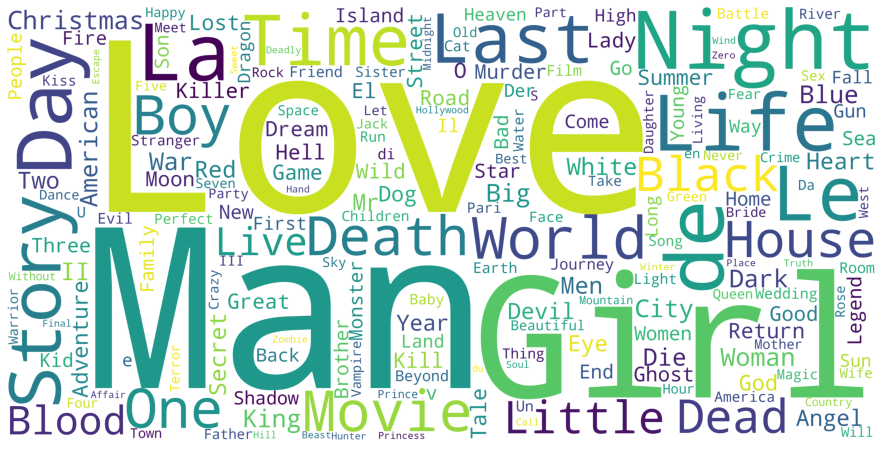

In [46]:
# Create a wordcloud of the movie titles
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

- We can observe from that Girl, Love and Man are the most popular title words
- We also observed that Warrior, Affair and Without are the least popular title words

In [47]:
# Creating a dataframe for the number of movies
num_ratings = pd.DataFrame(df_full_movies.groupby('movieId').count()['rating']).reset_index()
df_full_movies = pd.merge(left=df_full_movies, right=num_ratings, on='movieId')
df_full_movies.rename(columns={'rating_x': 'rating', 'rating_y': 'NumberRatings'}, inplace=True)
df_full_movies.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,NumberRatings
0,5163,57669,4.0,1518349992,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]",4253
1,87388,57669,3.5,1237455297,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]",4253
2,137050,57669,4.0,1425631854,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]",4253
3,120490,57669,4.5,1408228517,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]",4253
4,50616,57669,4.5,1446941640,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]",4253


In [48]:
# Dropping the duplicates in the movies
Remove_duplicates = df_full_movies.drop_duplicates('movieId')
Remove_duplicates.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,NumberRatings
0,5163,57669,4.0,1518349992,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]",4253
4253,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]",4648
8901,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,"Action,Comedy,Sci-Fi","[Tommy Lee Jones, Will Smith, Rip Torn, Lara F...",Lowell Cunningham,88.0,"$140,000,000","[lingerie, michael jackson character, shorthai...",5730
14631,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),"Adventure,Comedy,Crime","[Sandra Bullock, Regina King, Enrique Murciano...",Marc Lawrence,115.0,"$45,000,000","[female protagonist, cleave gag, good woman, fbi]",658
15289,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,"Drama,Horror,Mystery,Thriller","[Jeff Davis, Heather Langenkamp, Miko Hughes, ...",Wes Craven,112.0,"$8,000,000","[freddy krueger, elm street, famous director a...",1077


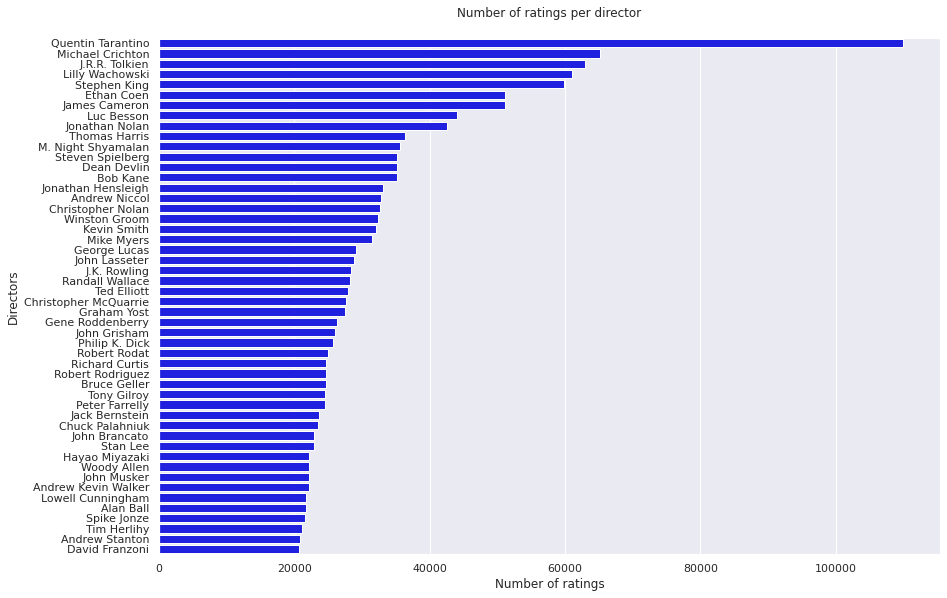

In [49]:
# Getting the number of ratings per director
Director_ratings = pd.DataFrame(Remove_duplicates.groupby('director').sum()['NumberRatings'].sort_values(ascending=False)).reset_index()

# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = Director_ratings.head(50), y = 'director', x = 'NumberRatings', color = 'Blue')
plt.ylabel('Directors')
plt.xlabel('Number of ratings')
plt.title('Number of ratings per director\n')
#plt.xlim(0, 27)
plt.show()

In [50]:
# Number of movies per director
director_movies = pd.DataFrame(Remove_duplicates.groupby('director').count()['title'].sort_values(ascending=False)).reset_index()
director_movies.head()

,director,title
0,Luc Besson,26
1,See full summary,25
2,Woody Allen,25
3,Stephen King,23
4,William Shakespeare,18


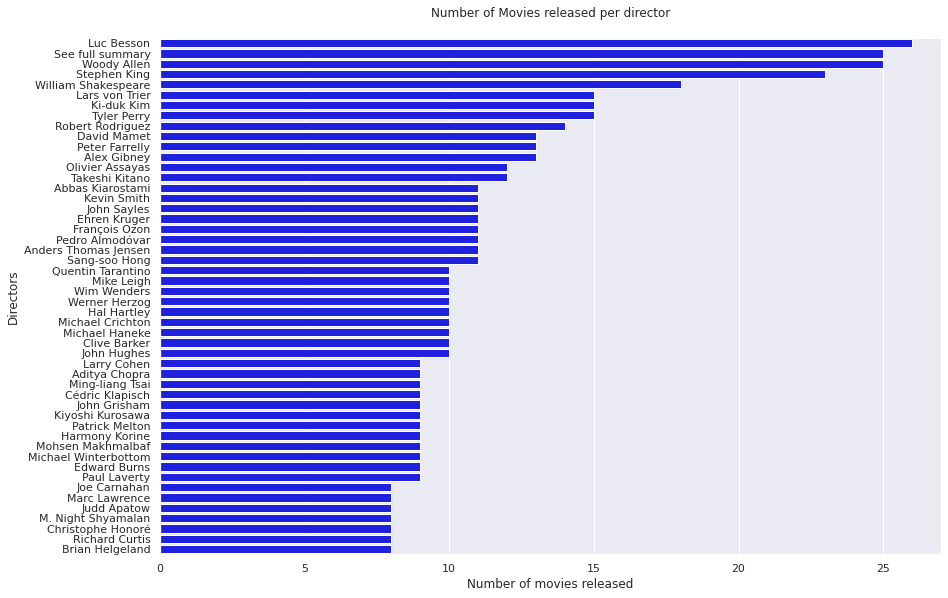

In [51]:
# Number of movies per director
director_movies = pd.DataFrame(Remove_duplicates.groupby('director').count()['title'].sort_values(ascending=False)).reset_index()


# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = director_movies.head(50), y = 'director', x = 'title', color = 'Blue')
plt.ylabel('Directors')
plt.xlabel('Number of movies released')
plt.title('Number of Movies released per director\n')
plt.xlim(0, 27)
plt.show()

##  &#128202; 3. Genres

In [52]:
df_full_movies.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,NumberRatings
0,5163,57669,4.0,1518349992,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]",4253
1,87388,57669,3.5,1237455297,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]",4253
2,137050,57669,4.0,1425631854,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]",4253
3,120490,57669,4.5,1408228517,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]",4253
4,50616,57669,4.5,1446941640,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,"$15,000,000","[dwarf, bruges, irish, hitman]",4253


In [53]:
print(genres_list)

['Documentary', 'Fantasy', 'Action', 'IMAX', 'Sci-Fi', 'Crime', 'Mystery', 'Romance', 'Drama', 'Horror', '(no genres listed)', 'Animation', 'Children', 'Thriller', 'Comedy', 'Adventure', 'Musical', 'Western', 'Film-Noir', 'War']


In [54]:
print(genre_labels)

['Documentary', 'Fantasy', 'Action', 'IMAX', 'Sci-Fi', 'Crime', 'Mystery', 'Romance', 'Drama', 'Horror', '(no genres listed)', 'Animation', 'Children', 'Thriller', 'Comedy', 'Adventure', 'Musical', 'Western', 'Film-Noir', 'War']


In [55]:
print(keyword_occurences)

[['Drama', 25606], ['Comedy', 16870], ['Thriller', 8654], ['Romance', 7719], ['Action', 7348], ['Horror', 5989], ['Documentary', 5605], ['Crime', 5319], ['(no genres listed)', 5062], ['Adventure', 4145], ['Sci-Fi', 3595], ['Children', 2935], ['Animation', 2929], ['Mystery', 2925], ['Fantasy', 2731], ['War', 1874], ['Western', 1399], ['Musical', 1054], ['Film-Noir', 353], ['IMAX', 195]]


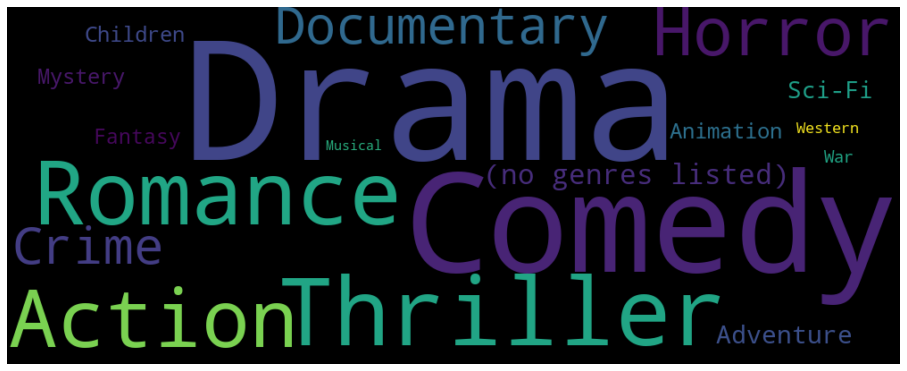

In [56]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# plot the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='black')
genre_wordcloud.generate_from_frequencies(genres)
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [57]:
# Some preprocessing will done on the budget column
#Removing commas
df_full_movies['budget'] = df_full_movies['budget'].str.replace(',', '')

#remove currency signs
df_full_movies['budget'] = df_full_movies['budget'].str.extract('(\d+)', expand=False)

# Replace Nan with 0 on budget
df_full_movies['budget'] = df_full_movies['budget'].replace(np.nan, 0)

In [58]:
# Removing the years from title
df_full_movies['release_year'] = df_full_movies.title.str.extract('(\(\d\d\d\d\))', expand=False)

In [59]:
#Removing brackets
df_full_movies['release_year'] = df_full_movies['release_year'].str.replace('[(,)]', '', regex=True)

In [60]:
# Changing the timestamp into years
import time
df_full_movies['timestamp'] = df_full_movies['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
df_full_movies.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,NumberRatings,release_year
0,5163,57669,4.0,2018,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,15000000,"[dwarf, bruges, irish, hitman]",4253,2008
1,87388,57669,3.5,2009,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,15000000,"[dwarf, bruges, irish, hitman]",4253,2008
2,137050,57669,4.0,2015,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,15000000,"[dwarf, bruges, irish, hitman]",4253,2008
3,120490,57669,4.5,2014,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,15000000,"[dwarf, bruges, irish, hitman]",4253,2008
4,50616,57669,4.5,2015,In Bruges (2008),"Comedy,Crime,Drama,Thriller","[Elizabeth Berrington, Rudy Blomme, Olivier Bo...",Martin McDonagh,107.0,15000000,"[dwarf, bruges, irish, hitman]",4253,2008


In [61]:
avg_ratings = df_full_movies.groupby(['movieId', 'title', 'genres', 'release_year'], as_index=False)['rating'].mean()
avg_ratings.head()

,movieId,title,genres,release_year,rating
0,1,Toy Story (1995),"Adventure,Animation,Children,Comedy,Fantasy",1995,3.889971
1,2,Jumanji (1995),"Adventure,Children,Fantasy",1995,3.263414
2,3,Grumpier Old Men (1995),"Comedy,Romance",1995,3.132325
3,4,Waiting to Exhale (1995),"Comedy,Drama,Romance",1995,2.878099
4,5,Father of the Bride Part II (1995),Comedy,1995,3.059165


In [62]:
genres = avg_ratings['genres'].apply(lambda x: x[0:].split(','))
genres.head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres, dtype: object

In [63]:
# create a new split_data dataframe
split_data = pd.DataFrame({'genres':genres.values}, index = avg_ratings['genres'].index)

split_data['rating'] = avg_ratings['rating']
split_data['title'] = avg_ratings['title']
split_data['year'] = avg_ratings['release_year']
split_data['movieId'] = avg_ratings['movieId']

split_data.head()

,genres,rating,title,year,movieId
0,"[Adventure, Animation, Children, Comedy, Fantasy]",3.889971,Toy Story (1995),1995,1
1,"[Adventure, Children, Fantasy]",3.263414,Jumanji (1995),1995,2
2,"[Comedy, Romance]",3.132325,Grumpier Old Men (1995),1995,3
3,"[Comedy, Drama, Romance]",2.878099,Waiting to Exhale (1995),1995,4
4,[Comedy],3.059165,Father of the Bride Part II (1995),1995,5


In [64]:
objs = [split_data, pd.DataFrame(split_data['genres'].tolist())]
new_df = pd.concat(objs, axis=1).drop('genres', axis=1).sort_values('rating', ascending=False)
final_ratings = pd.melt(new_df, var_name='genre', value_name="genres", id_vars=['movieId','rating','title', 'year'], value_vars=[0,1,2,3,4,5,6,7,8]).sort_values('rating', ascending=False)
final_ratings = final_ratings[final_ratings.genres.notnull()].drop("genre", axis=1)
final_ratings.sort_values(by=['movieId'], inplace=True)
final_ratings.head()

,movieId,rating,title,year,genres
49032,1,3.889971,Toy Story (1995),1995,Children
1958,1,3.889971,Toy Story (1995),1995,Adventure
72569,1,3.889971,Toy Story (1995),1995,Comedy
96106,1,3.889971,Toy Story (1995),1995,Fantasy
25495,1,3.889971,Toy Story (1995),1995,Animation


In [65]:
# Total number of movies with a specific genre counted multiple times for multi genre movies
genre_count = final_ratings.groupby('genres').count()[['movieId']]
genre_count = genre_count.rename(columns = {'movieId': 'count'})
genre_count = genre_count.sort_values('count', ascending=False)

count = genre_count['count'].tolist()
genre = genre_count.index.tolist()
genre_count = pd.DataFrame({'genre': genre, 'count': count})
genre_count

,genre,count
0,Drama,11872
1,Comedy,7427
2,Romance,3741
3,Thriller,3677
4,Action,2971
5,Crime,2627
6,Horror,2204
7,Adventure,2037
8,Documentary,1883
9,Sci-Fi,1485


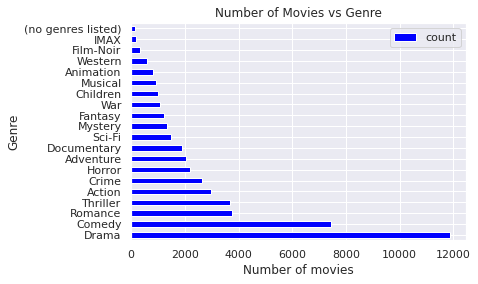

In [66]:
genre_count.plot.barh(x = 'genre', y = 'count', color = 'blue')
plt.xlabel('Number of movies')
plt.ylabel('Genre')
plt.title('Number of Movies vs Genre')

plt.show()

In [67]:
avg_genre_ratings = final_ratings.groupby(['genres'], as_index=False)['rating'].mean()
avg_genre_ratings = avg_genre_ratings.sort_values(by=['rating'], ascending=False)
avg_genre_ratings

,genres,rating
7,Documentary,3.438759
10,Film-Noir,3.381470
18,War,3.349401
8,Drama,3.280426
12,IMAX,3.245628
15,Romance,3.235825
13,Musical,3.215845
3,Animation,3.204362
6,Crime,3.190597
14,Mystery,3.177240


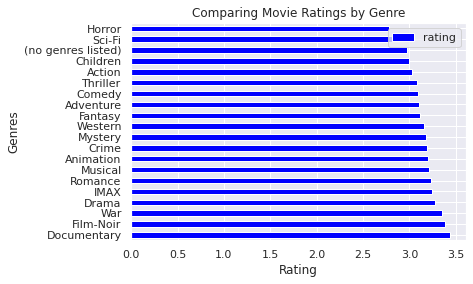

In [68]:
avg_genre_ratings.plot.barh(x = 'genres', y='rating', color = 'blue')
plt.xlabel('Rating')
plt.ylabel('Genres')
plt.title('Comparing Movie Ratings by Genre')

plt.show()

In [69]:
final_ratings.sort_values(by=['year'], ascending=True)
final_ratings

,movieId,rating,title,year,genres
49032,1,3.889971,Toy Story (1995),1995,Children
1958,1,3.889971,Toy Story (1995),1995,Adventure
72569,1,3.889971,Toy Story (1995),1995,Comedy
96106,1,3.889971,Toy Story (1995),1995,Fantasy
25495,1,3.889971,Toy Story (1995),1995,Animation
...,...,...,...,...,...
9338,131258,3.388889,The Pirates (2014),2014,Adventure
1335,131260,4.000000,Rentun Ruusu (2001),2001,(no genres listed)
69265,131262,2.100000,Innocence (2014),2014,Horror
45728,131262,2.100000,Innocence (2014),2014,Fantasy


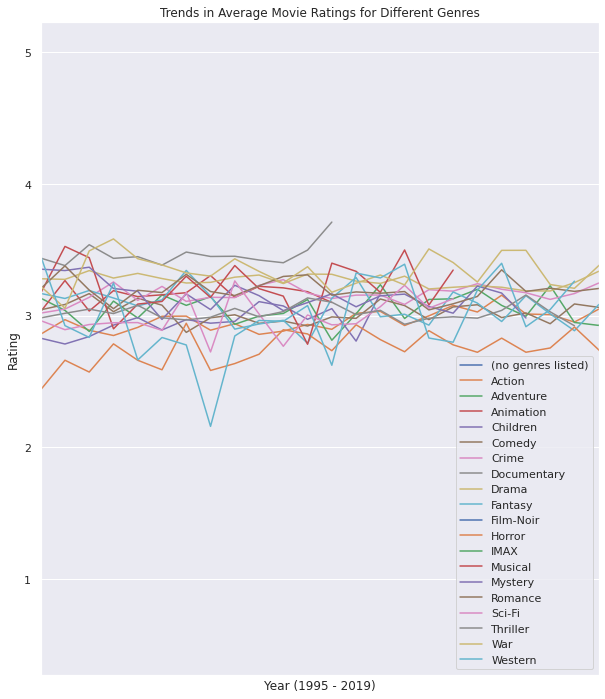

In [70]:
rating_acrossYears = final_ratings.groupby(['genres', 'year'], as_index=False)['rating'].mean()

fig, ax = plt.subplots(figsize=(10, 12))
for genre, year in rating_acrossYears.groupby('genres'):
    year.plot(x='year', y='rating', ax=ax, label=genre)
    
plt.xlabel('Year (1995 - 2019)')
plt.xlim(71, 94) 
plt.ylabel('Rating')
plt.title('Trends in Average Movie Ratings for Different Genres')
plt.show()

## Step 3: Build and evaluate models

In [71]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [72]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [73]:
def train_split(df) :
  reader = Reader()
  data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)
  trainset, testset = train_test_split(data, test_size=0.25, random_state=42)
  return trainset, testset


In [74]:
def SVD_train_split(df) :
  reader = Reader()
  data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)
  trainset, testset = train_test_split(data, test_size=.1, random_state=42)
  return trainset, testset

In [75]:
def train_split_size(X, y) :
  X = X.n_ratings
  y = len(y)
  return print("Size of train ratings: ", X, "and Size of test ratings: ", y)

In [76]:
# def train_split_size_GridSearch(X) :
#   X = len(X)
# #   y = len(y)
#   return print("Size of train ratings: ", X)

In [77]:
def build_model(model, trainset, testset) :
  model = model
  model.fit(trainset)
  trainset_pred = model.test(trainset.build_testset())
  testset_pred_test = model.test(testset)
  return model, trainset_pred, testset_pred_test


In [78]:
def build_model_GridSearch(df) :
    reader = Reader
    data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader = reader)
    param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [1, 2]},
              'k': [2, 3],
              'sim_options': {'name': ['msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False]}
              }
    model = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=1)
    trainset_pred = model.fit(trainset)
    return model, trainset_pred



# reader = Reader(rating_scale=(1, 5))
# data = Dataset.load_from_df(df[['profile_id', 'content_id', 'rating']], reader)
# trainset, testset = train_test_split(data, test_size=.25, random_state=20)


# param_grid = {
#               'n_factors': [30],
#               'n_epochs': [5, 10, 20], 
#               'lr_all': [0.002, 0.006, 0.018, 0.054, 0.10, 0.15]
#              }
# algo = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=3)
# model = algo.fit(trainset)  // error occurs here


# from surprise import SVD
# from surprise import Dataset
# from surprise.model_selection import GridSearchCV

# # Use movielens-100K
# data = Dataset.load_builtin('ml-100k')

# param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]}
# gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

# gs.fit(data)

# # best RMSE score
# print(gs.best_score['rmse'])

# # combination of parameters that gave the best RMSE score
# print(gs.best_params['rmse'])

In [79]:
def get_RMSE_score_GridSearch(X) :
  X = accuracy.rmse(X)
  return print("best RMSE score: ", X.best_score['rmse'], "and combination of parameters that gave the best RMSE score: ", X.best_params['rmse'])

In [80]:
def get_RMSE_score(X, y) :
  X = accuracy.rmse(X)
  y = accuracy.rmse(y)
  return print("Training set RMSE score: ", X, "and Testing set RMSE score: ", y)

In [81]:
# model.predict(1, 4144).est

In [82]:
def create_submission(df, model) :
  # df.tail()
  sub_pred = []
  for i, row in df.iterrows():
      sub_pred.append(model.predict(row["userId"], row["movieId"]).est)
  df_submission = pd.DataFrame()
  df_submission["Id"] = df["userId"].astype(str) + "_" + df["movieId"].astype(str)
  df_submission["rating"] = sub_pred
  return df_submission

In [83]:
def save_sub_file(df) :
  now = datetime.now().strftime("%Y%m%d%H%M")
  # df_submission.to_csv(f"submissions/Kwanda{model}_{now}.csv", index=False)
  df_submission.to_csv(f'Kwandas_{now}.csv', index=False)
  name = f'Kwandas_{now}.csv'
  return name

## Base Model

In [84]:
model = BaselineOnly()

In [85]:
trainset, testset = train_split(df_train)

In [86]:
test_size = train_split_size(trainset, testset)
test_size

Size of train ratings:  7500028 and Size of test ratings:  2500010


In [87]:
model, trainset_pred, testset_pred = build_model(model, trainset, testset)

Estimating biases using als...


In [88]:
train_n_test_score = get_RMSE_score(trainset_pred, testset_pred)
train_n_test_score

RMSE: 0.8535
RMSE: 0.8674
Training set RMSE score:  0.8534985777319416 and Testing set RMSE score:  0.8673658521444142


In [ ]:
df_submission = create_submission(df_test, model)
df_submission.head()

In [ ]:
df_sub_file = save_sub_file(df_submission)

# Base Model with GridSearch

In [ ]:
# from surprise import SVD
# from surprise import Dataset
# from surprise.model_selection import GridSearchCV

# # Use movielens-100K
# data = Dataset.load_builtin('ml-100k')

# param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]}
# gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

# gs.fit(data)

# # best RMSE score
# print(gs.best_score['rmse'])

# # combination of parameters that gave the best RMSE score
# print(gs.best_params['rmse'])

In [ ]:
# model, trainset_pred = build_model_GridSearch(df_train)

In [ ]:
# train_score = get_RMSE_score_GridSearch(trainset_pred)
# train_score

In [ ]:
# df_submission = create_submission(df_test, model)
# df_submission.head()

In [ ]:
# df_sub_file = save_sub_file(df_submission)

# SVD Base Model

In [ ]:
# model = SVD()

In [ ]:
# trainset, testset = SVD_train_split(df_train)

In [ ]:
# test_size = train_split_size(trainset, testset)
# test_size

In [ ]:
# model, trainset_pred, testset_pred = build_model(model, trainset, testset)

In [ ]:
# train_n_test_score = get_RMSE_score(trainset_pred, testset_pred)
# train_n_test_score

In [ ]:
# df_submission = create_submission(df_test, model)
# df_submission.head()

In [ ]:
# df_sub_file = save_sub_file(df_submission)

# SVD Base Model with Cross-Validation

In [ ]:
# model = SVD()

In [ ]:
# reader = Reader(rating_scale=(0,5))
# data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

In [ ]:
# # Run 5-fold cross-validation and print results
# cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
#Download csv
FileLink(df_sub_file)

In [ ]:
#delete csv
file = "/kaggle/working/"+df_sub_file
os.remove(file)

In [ ]:
experiment.end()